In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [2]:
rand_state=1000

In [32]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli5Polygon2.txt') 

In [33]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli5Polygon2.csv', index=None)

In [34]:
df = pd.read_table('AOI_hitStimuli5Polygon2.csv')

In [35]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli_5_Polygon2
0,Skilled,621,315,416,619,302,0
1,Skilled,620,314,416,619,302,0
2,Skilled,620,316,416,619,302,0
3,Skilled,618,315,416,619,302,0
4,Skilled,618,315,416,619,302,0


In [36]:
df.nunique()

Skill_level                     2
Gaze_point_X                  739
Gaze_point_Y                  681
Gaze_event_duration           109
Fixation_point_X              452
Fixation_point_Y              497
AOI_hit_Stimuli_5_Polygon2      2
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25780 entries, 0 to 25779
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Skill_level                 25780 non-null  object
 1   Gaze_point_X                25780 non-null  int64 
 2   Gaze_point_Y                25780 non-null  int64 
 3   Gaze_event_duration         25780 non-null  int64 
 4   Fixation_point_X            25780 non-null  int64 
 5   Fixation_point_Y            25780 non-null  int64 
 6   AOI_hit_Stimuli_5_Polygon2  25780 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.4+ MB


In [38]:
df.isna().sum()

Skill_level                   0
Gaze_point_X                  0
Gaze_point_Y                  0
Gaze_event_duration           0
Fixation_point_X              0
Fixation_point_Y              0
AOI_hit_Stimuli_5_Polygon2    0
dtype: int64

In [39]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli_5_Polygon2
count,25780.000000,25780.000000,25780.000000,25780.000000,25780.000000,25780.000000
mean,547.427967,323.205818,515.138906,547.291505,323.813305,0.080644
std,130.988688,146.839191,429.650300,130.559648,146.226561,0.272293
min,-249.000000,-44.000000,66.000000,-240.000000,-37.000000,0.000000
25%,469.000000,217.000000,233.000000,470.000000,218.000000,0.000000
50%,542.000000,270.000000,366.000000,541.000000,271.000000,0.000000
75%,649.000000,438.000000,632.000000,649.000000,441.000000,0.000000
max,1246.000000,810.000000,2579.000000,928.000000,795.000000,1.000000


<Figure size 600x400 with 0 Axes>

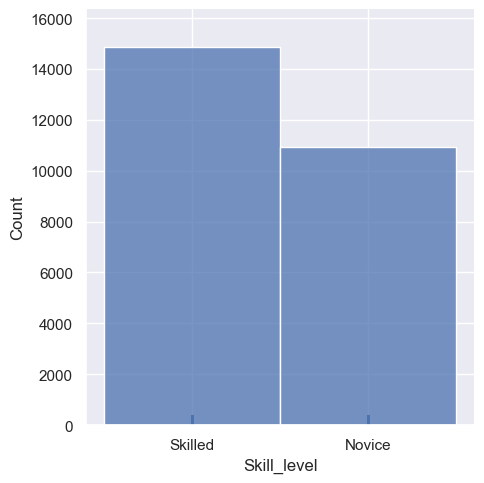

In [40]:
plt.figure(figsize=(6,4))
sns.displot(df['Skill_level'], rug=True)
plt.show()

In [41]:
ordinal_categoricals = ['Skill_level']

In [42]:
from sklearn.preprocessing import OrdinalEncoder

In [43]:
enc = OrdinalEncoder()

In [44]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [46]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli_5_Polygon2
0,1.0,621,315,416,619,302,0
1,1.0,620,314,416,619,302,0
2,1.0,620,316,416,619,302,0
3,1.0,618,315,416,619,302,0
4,1.0,618,315,416,619,302,0


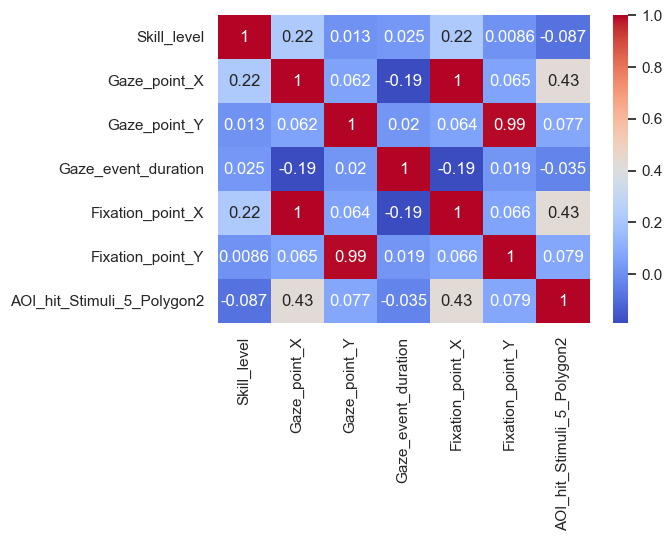

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [50]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli_5_Polygon2
0,1.0,621,315,416,619,302,0
1,1.0,620,314,416,619,302,0
2,1.0,620,316,416,619,302,0
3,1.0,618,315,416,619,302,0
4,1.0,618,315,416,619,302,0


CPU times: total: 8.12 s
Wall time: 8.27 s


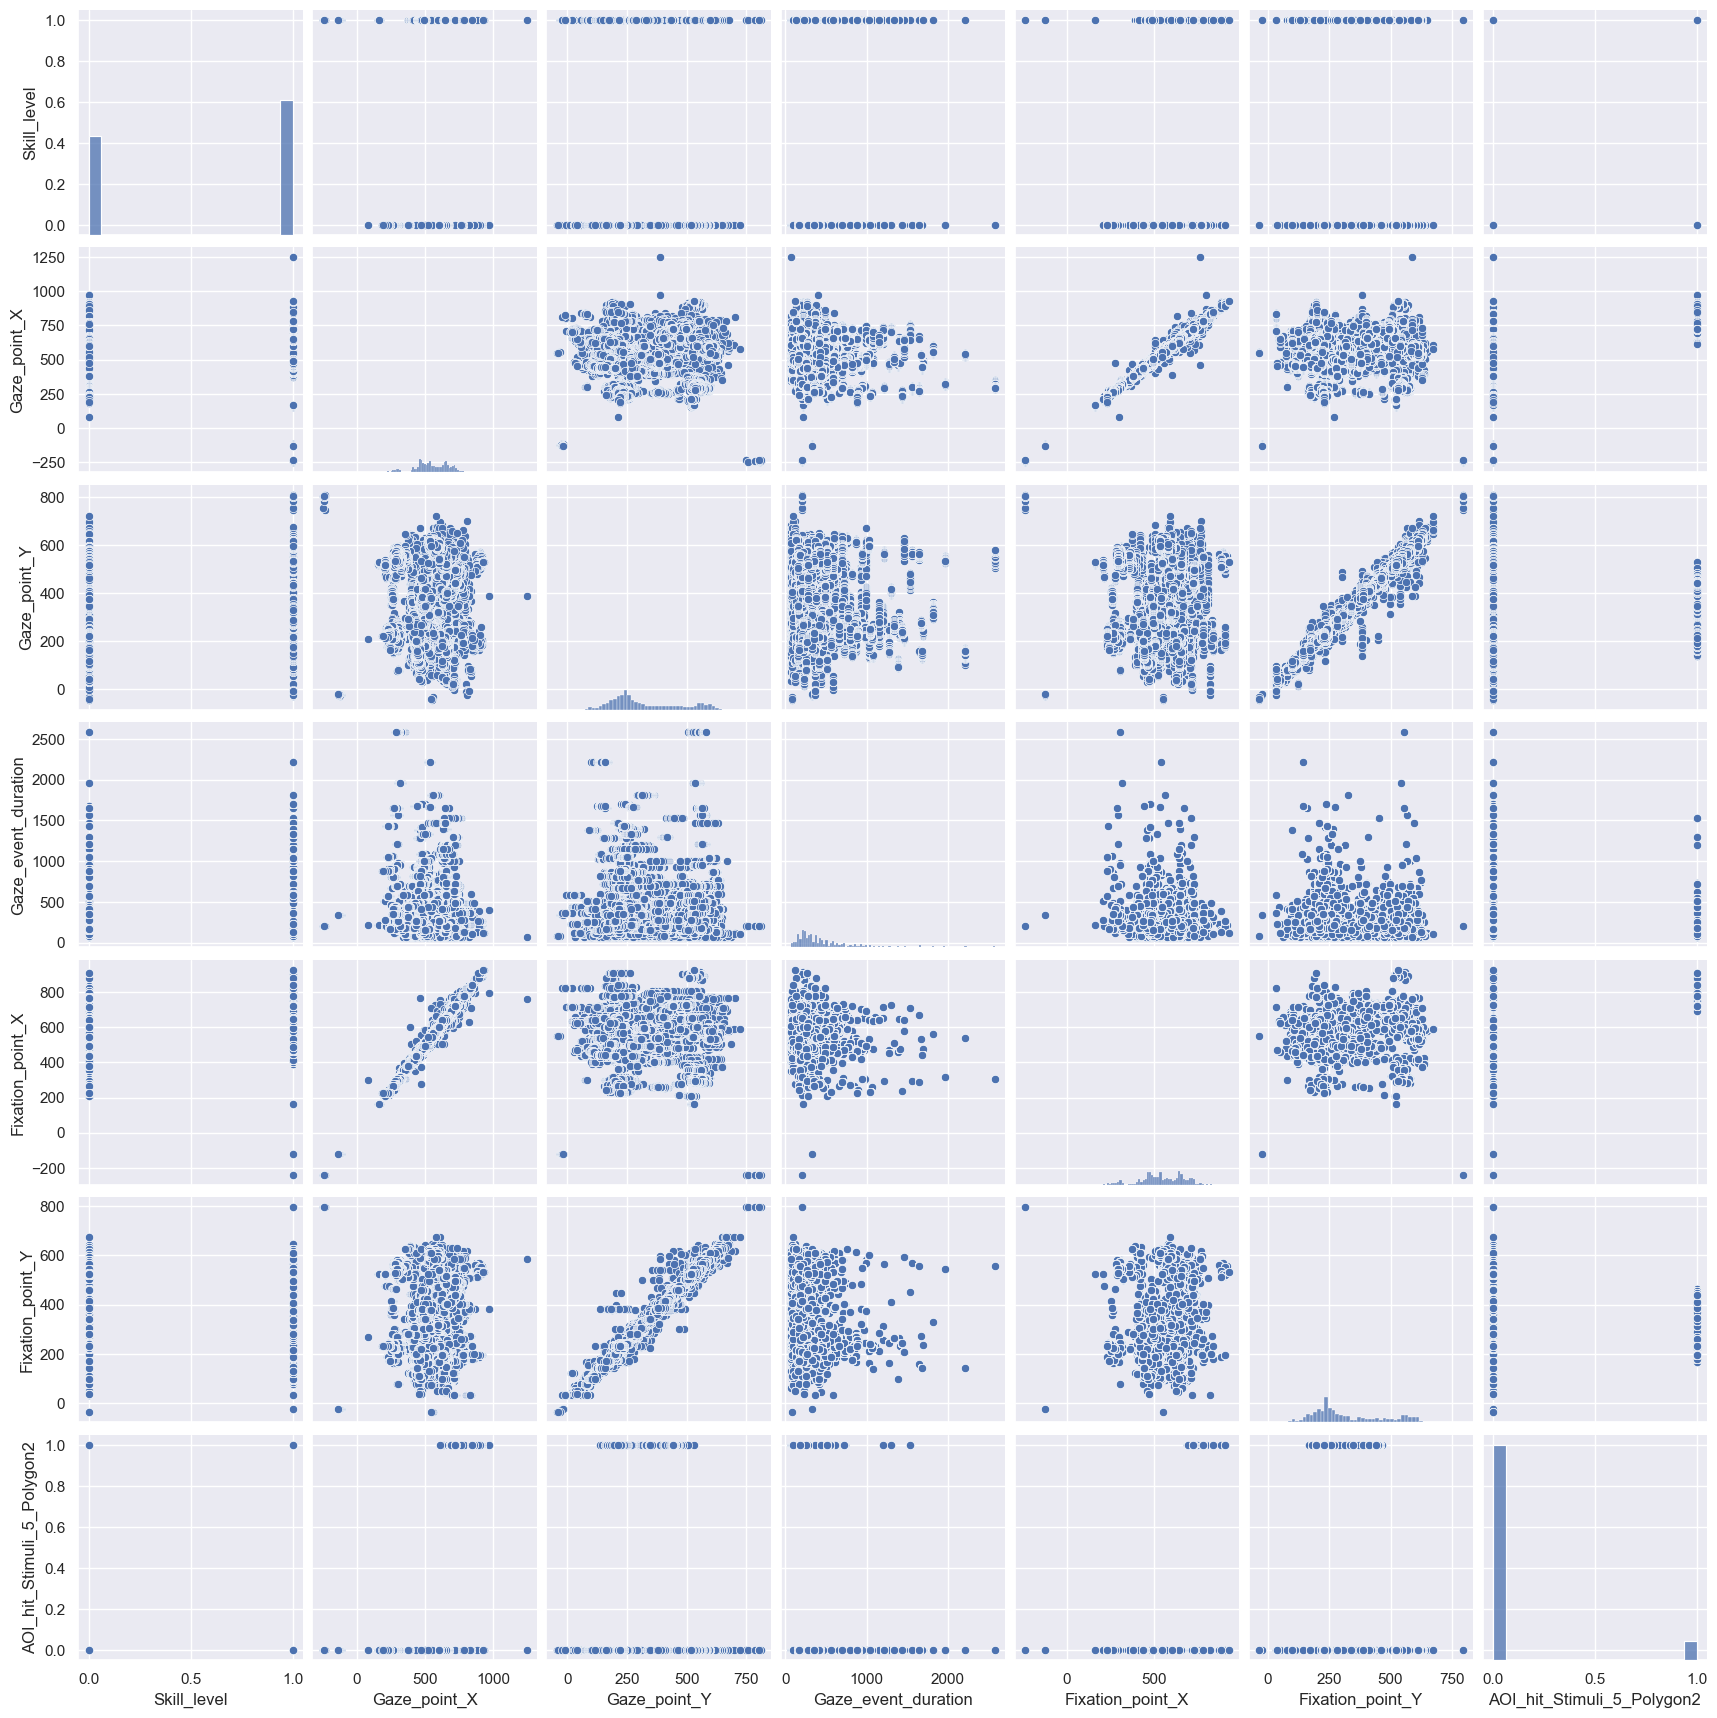

In [54]:
%%time

sns.pairplot(df[['Skill_level', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration', 'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli_5_Polygon2' ]])

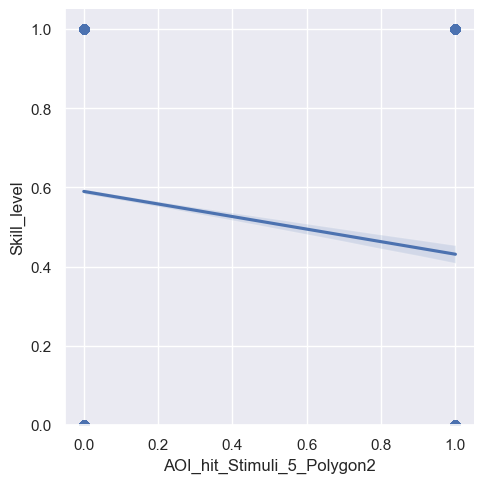

In [56]:
g= sns.lmplot(x='AOI_hit_Stimuli_5_Polygon2', y='Skill_level', data=df)
g.set(ylim=(0, None))
plt.show()

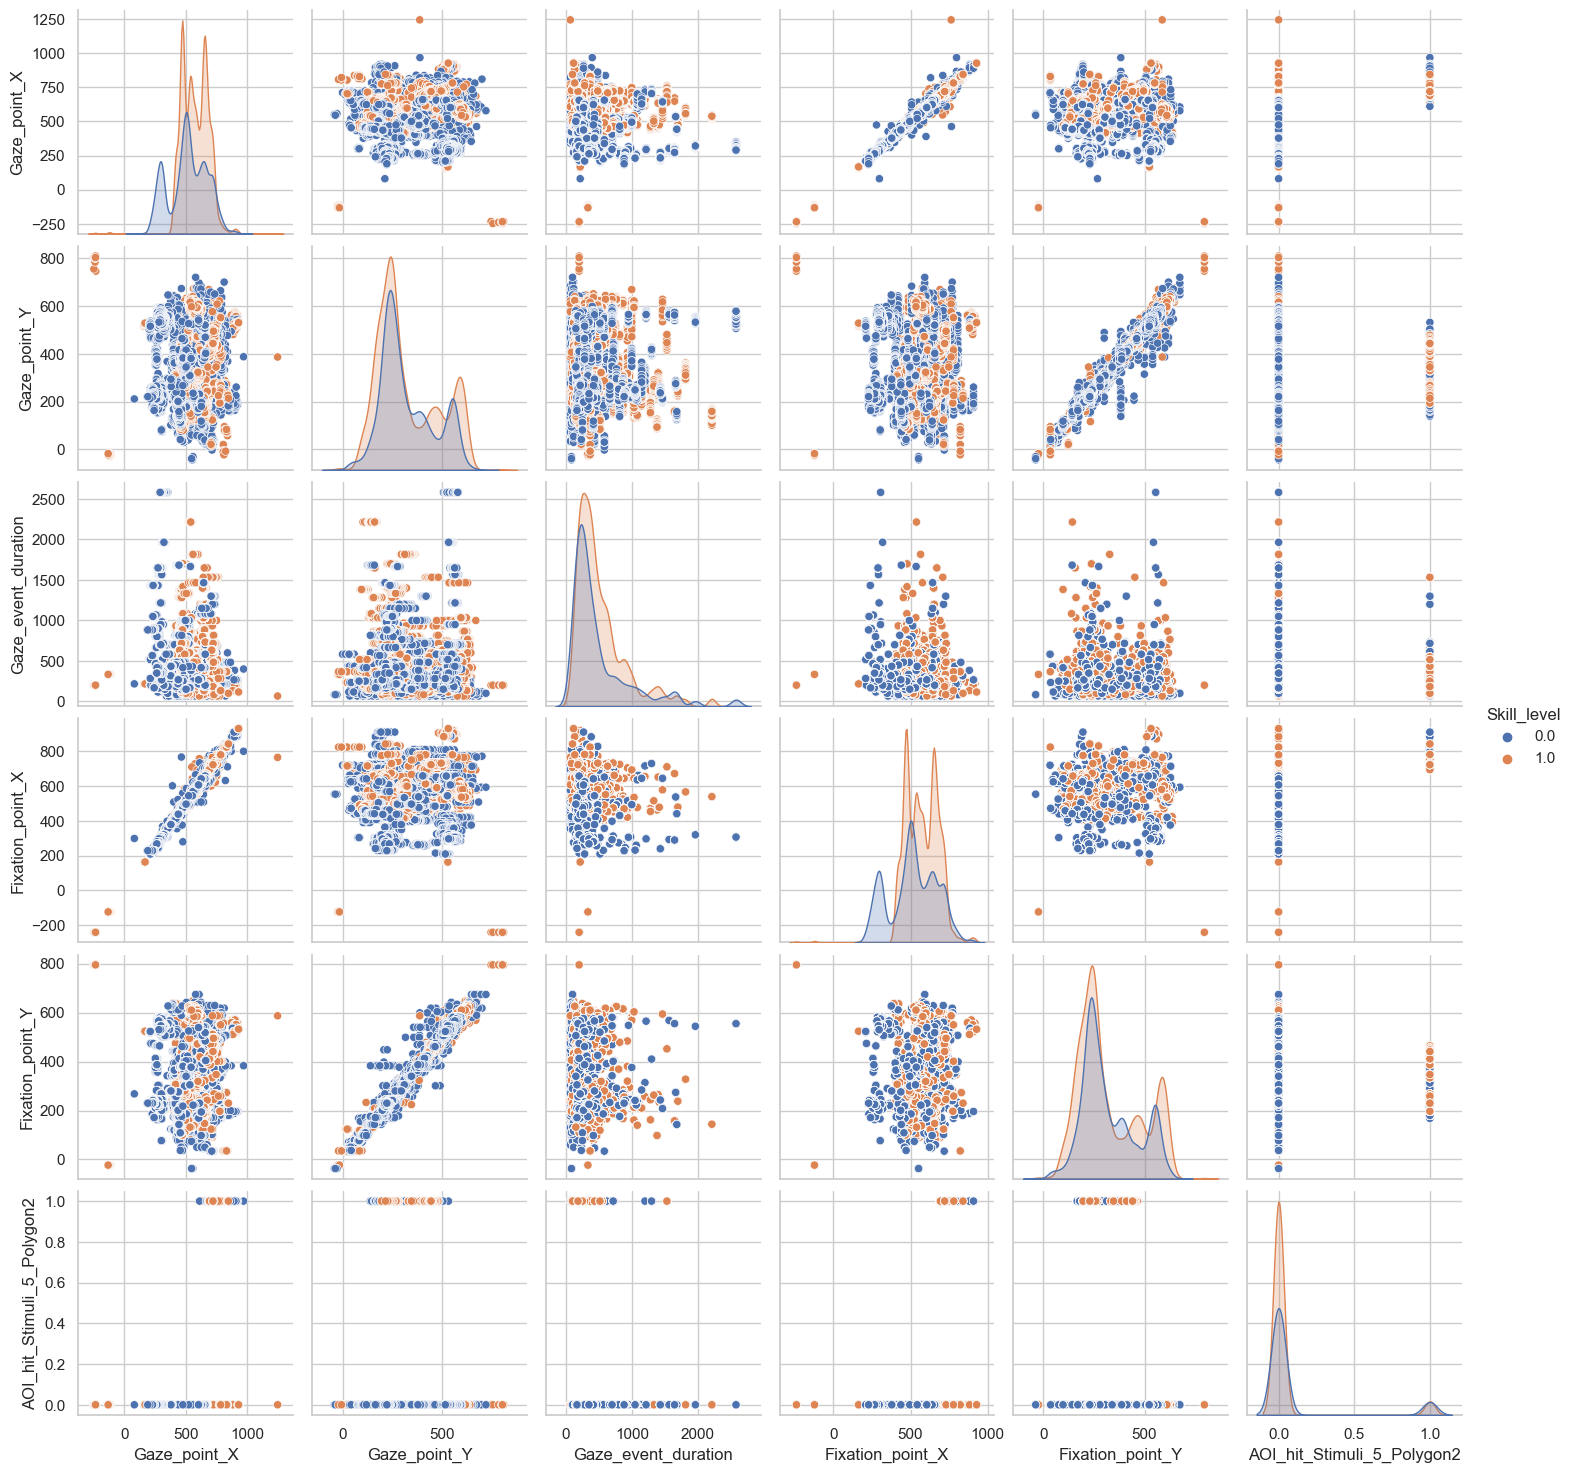

In [57]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Skill_level')

In [58]:
y = df['Skill_level']
X = df.drop('Skill_level', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.8

In [59]:
reg_model = LinearRegression()


In [60]:
X_train.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli_5_Polygon2
25150,299,220,333,306,225,0
21956,549,605,283,549,607,0
14835,671,563,333,683,548,0
12296,458,175,516,461,166,0
15794,908,188,266,908,196,1


In [61]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_hat = reg_model.predict(X_test)

In [63]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
13021,1.0,0.574153,0.425847
23616,0.0,0.527056,-0.527056
10523,0.0,0.769847,-0.769847
20350,1.0,0.560294,0.439706
22907,0.0,0.347213,-0.347213


In [64]:
reg_model.coef_

array([-5.69817971e-04,  1.48298745e-03,  9.22244179e-05,  1.81891893e-03,
       -1.47321713e-03, -4.10490057e-01])

In [65]:
reg_summary = pd.DataFrame(data= X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,Gaze_point_X,-0.0006
1,Gaze_point_Y,0.0015
2,Gaze_event_duration,0.0001
3,Fixation_point_X,0.0018
4,Fixation_point_Y,-0.0015
5,AOI_hit_Stimuli_5_Polygon2,-0.4105


In [66]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_train, y_train),3))

Training data R-squared: 0.097
Test data R-squared: 0.097


In [69]:
X_train.shape

(20624, 6)

In [70]:
def adj_R2(X,y):
    R2 = reg_model.score(X,y)
    n = X.shape[0]
    k = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [71]:
adj_R2(X_train, y_train)

0.096

In [72]:
df_predictions.head()

,actuals,predictions,resid
13021,1.0,0.574153,0.425847
23616,0.0,0.527056,-0.527056
10523,0.0,0.769847,-0.769847
20350,1.0,0.560294,0.439706
22907,0.0,0.347213,-0.347213


In [73]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.219

In [74]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.219

In [75]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.468

In [76]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [77]:
my_estimator = LinearRegression()

In [78]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [79]:
R2

array([0.07336491, 0.10721588, 0.09107833, 0.09861059, 0.10819726])

In [80]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [81]:
MSE = -NMSE
MSE

array([0.22674121, 0.21729016, 0.22125359, 0.22014093, 0.21720572])

In [82]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

0.221

In [83]:
RMSE = np.sqrt(MSE)
RMSE

array([0.47617351, 0.46614393, 0.47037601, 0.46919178, 0.46605334])